# Continuous: Symmetric
These distributions are symmetric about their mean, usually denoted by parameter A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.special import btdtr

In [2]:
def plot(fn, *args):
    x = np.linspace(-6,6, 100)
    
    for arg in args:
        if len(arg) == 2:
            y = fn(arg[0], arg[1], x)
        elif len(arg) == 3:
            y = fn(arg[0], arg[1], arg[2], x)
        plt.plot(x, y)
        mx = np.argmax(y)
        my = y[int(mx)]
        mx = x[mx] + 1
        plt.text(mx, my, str(arg))
    plt.show()

# Cauchy(A,B)
Constraint: $b > 0$

$$PDF = \frac{1}{\pi B}\Bigg[ 1 + \bigg(\frac{y-A}{B}^2\bigg) \Bigg]^{-1}$$

$$ CDF = \frac{1}{2} + \frac{1}{\pi}tan^{-1} \bigg(\frac{y-A}{B}\bigg) $$

### Parameters:
A($\theta$) : Location <br>
B($\lambda$) : Scale

In [3]:
def cauchy_PDF(A, B, x):
    a = 1/(np.pi * B)
    b = 1 + ((x-A)/B)**2
    return a*(1/b)

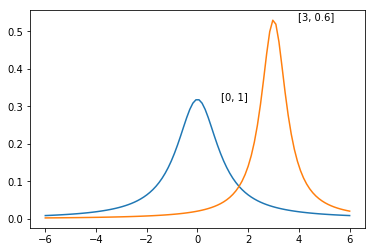

In [4]:
plot(cauchy_PDF, [0,1], [3, 0.6])

### Moments
Mode = Median = A <br>
Moments do not exist. <br>
$ RandVar = A + B \cdot tan \Bigg[\pi\bigg(u-\frac{1}{2}\bigg)\Bigg] $


### Notes
1. Since there are no finite moments, the location parameter (ostensibly the mean) does not have its usual interpretation for a symmetric distribution.

### Aliases and Special Cases
1. The Cauchy distribution is sometimes called the Lorentz distribution

### Characterizations
1. If U and V are ∼ Normal(0, 1), the ratio U/V ∼ Cauchy(0, 1).
2. If Z ∼ Cauchy, then W = (a + b Z)<sup>-1</sup> ∼ Cauchy
3. If particles emanate from a fixed point, their points of impact on a straight line ∼ Cauchy

# Cosine(A,B)
Constraint: $A - \pi B \leqslant y \leqslant A + \pi B, B > 0$

$$ PDF = \frac{1}{2\pi B}\Bigg[1+cos\bigg(\frac{y-A}{B}\bigg)\Bigg] $$
$$ CDF = \frac{1}{2\pi}\Bigg[\pi + \frac{y-A}{B}+sin \bigg(\frac{y-A}{B}\bigg)\Bigg]$$

### Parameters:
A($\theta$) : Location <br>
B($\lambda$) : Scale

In [5]:
def cosine_PDF(A, B, x):
    a = 1/(2*np.pi*B)
    b = 1 + np.cos((x-A)/B)
    return a*b

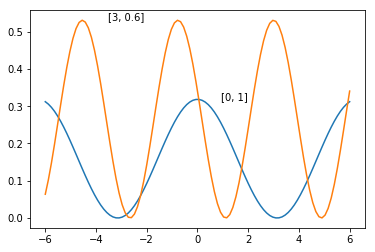

In [6]:
plot(cosine_PDF, [0, 1], [3, 0.6])

### Moments
Mean = Median = Mode = A <br>
Variance = B<sup>2</sup>(π<sup>2</sup>-6)/3 <br>
Skewness = 0 <br>
Kurtosis = B<sup>4</sup>(π<sup>4</sup>-20π<sup>2</sup>+120)/5<br>

### Characterisations:
1. The Cosine distribution is sometimes used as a simple, and more computationally tractable, alternative to the Normal distribution.

# Double Weibull (A,B,C)
Constraint: B, C > 0

$$ PDF = \frac{C}{2B} \bigg\lvert \frac{y-A}{B}\bigg\rvert ^{C-1} exp\bigg(\ - \bigg\lvert \frac{y-A}{B}\bigg\rvert ^C\bigg)$$

$$ 
 CDF = 
\begin{cases}
    \frac{1}{2} exp \bigg[-\big(\frac{y-A}{B}\big)^C \bigg],& y \leq A\\
    1- \frac{1}{2} exp \bigg[-\big(\frac{y-A}{B}\big)^C \bigg], & y > A
\end{cases}
$$

### Parameters:
A : Location <br>
B : Scale <br>
C : Shape

In [7]:
def double_weibull_PDF(A, B, C, x):
    _ = (C / 2*B) * np.abs((x-A)/B)**(C-1)
    _ *= np.exp(-np.abs((x-A)/B)**C)
    return _

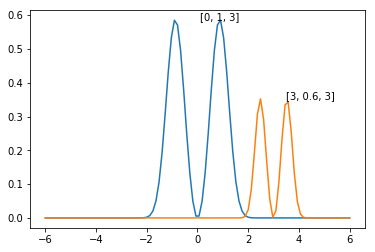

In [8]:
plot(double_weibull_PDF, [0, 1, 3], [3,0.6,3])

### Moments
Mean = Median = A <br>
Variance = $\Gamma \big(\frac{C+2}{C}\big)B^2$ <br>
Skewness = 0

### Notes:
1. The Double Weibull distribution becomes the Laplace distribution when C = 1.

### Characterisations:
1. The Double Weibull distribution is the signed analogue of the Weibull distribution.

# Hyperbolic Secant (A,B)
Constraint: B > 0

$$ PDF = \frac{1}{\pi B} sech \big(\frac{y-A}{B}\big)$$

$$ CDF = \frac{2}{\pi}tan^{-1} \bigg[ exp\bigg(\frac{y-A}{B}\bigg)\bigg] $$

### Parameters
A($\mu$): Location <br>
B($\theta$): Scale

In [9]:
def hyperbolic_secant_PDF(A, B, x):
    sech = lambda z: 1/np.cosh(z)
    return 1 / (np.pi * B) * sech((x-A)/B)

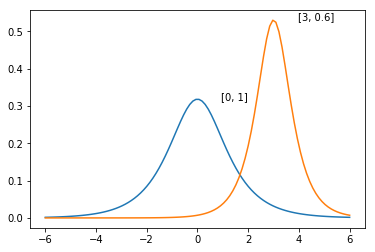

In [10]:
plot(hyperbolic_secant_PDF, [0,1], [3, 0.6])

### Moments
Mean = Median = Mode = A <br>
Variance = $\frac{\pi^2}{4}B^2$
Skewness = 0
Kurtosis = $ \frac{5\pi^4}{16}B^4 $

### Notes
1. The HyperbolicSecant distribution is related to the Logistic distribution.

### Characterizations
1. The HyperbolicSecant distribution is often used in place of the Normal distribution when
the tails are less than the latter would produce.
2. The HyperbolicSecant distribution is frequently used in lifetime analyses.

# Laplace (A,B)
Constraint: B > 0

$$ PDF = \frac{1}{2B} exp \bigg(-\frac{|y-A|}{B}\bigg) $$

$$ 
 CDF = 
\begin{cases}
    \frac{1}{2} exp -\big(\frac{y-A}{B}\big),& y \leq A\\
    1- \frac{1}{2} exp -\big(\frac{y-A}{B}\big), & y > A
\end{cases}
$$

### Parameters
A($\mu$): Location <br>
B($\lambda$): Scale

In [11]:
def laplace_PDF(A, B, x):
    _ = np.exp(-np.abs(x-A)/B)
    return 1 / (2*B) * _

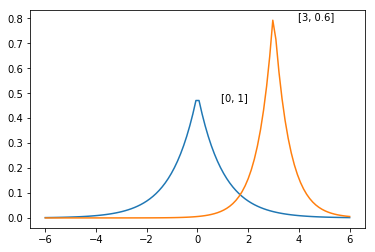

In [12]:
plot(laplace_PDF, [0,1], [3,0.6])

### Monents
Mean = Median = Mode = A <br>
Variance = $2B^2$ <br>
Skewness = 0 <br>
Kurtosis = $24B^4$

### Notes
#### Aliases and Special Cases
1. The Laplace distribution is often called the double-exponential distribution.
2. It is also known as the bilateral exponential distribution.

#### Characterizations
1. The Laplace distribution is the signed analogue of the Exponential distribution.
2. Errors of real-valued observations are often ~Laplace or ~Normal.

# Logistic (A, B)
Constraint: B > 0

$$ PDF = \frac{1}{B}exp\bigg(-\frac{y-A}{B}\bigg)\bigg[1+exp\bigg(-\frac{y-A}{B}\bigg)\bigg]^{-2} $$

$$ CDF = \bigg[1+exp\bigg(-\frac{y-A}{B}\bigg)\bigg]^{-1} $$

### Parameters
A : Location <br>
B : Scale

In [13]:
def logistic_PDF(A, B, x):
    _ = (1/B) * np.exp((-(x-A)/B))
    return _ * np.power(1+np.exp(-(x-A)/B), -2)

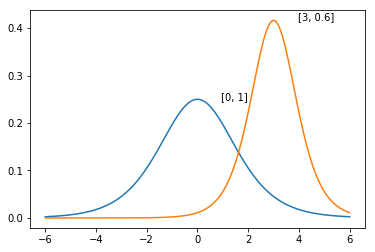

In [14]:
plot(logistic_PDF, [0,1], [3,0.6])

### Moments
Mean = Median = Mode = A <br>
Variance = $\frac{\pi^2B^2}{3}$ <br>
Skewness = 0 <br>
Kurtosis = $\frac{7\pi^4B^4}{15}$

#### Notes
1. The Logistic distribution is often used as an approximation to other symmetric distributions due to the mathematical tractability of its CDF.
2. The Logistic distribution is sometimes called the Sech-squared distribution

#### Characterizations
1. The Logistic distribution is used to describe many phenomena that follow the logistic law of growth.
2. lf lo and hi are the minimum and maximum of a random sample (size =N), then, as $N \to \inf$ the asymptotic distribution of the midrange $\equiv$ (hi - lo)/2 is ~logistic

# Normal(A,B)
Constraint: B > 0

$$ PDF = \frac{1}{B\sqrt{2\pi}} exp\bigg[-\frac{(y-A)^2}{2B^2}\bigg] $$

$$ CDF = \frac{1}{2}\bigg[1-erf\bigg(\frac{A-y}{B\sqrt{2}}\bigg)\bigg] \equiv\Phi \bigg(\frac{y-A}{B}\bigg) $$

### Parameters
A($\mu$) : Location <br>
B($\sigma$) : Scale

In [15]:
def normal_PDF(A, B, x):
    _ = 1 / (B * np.sqrt(2*np.pi))
    return _ * np.exp(-((x-A)**2)/(2*B**2))  

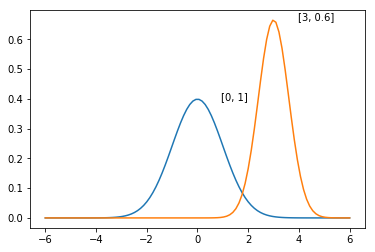

In [16]:
plot(normal_PDF, [0, 1], [3, 0.6])

### Monents
Mean = Median = Mode = A <br>
Variance = $B^2$ <br>
Skewness = 0 <br>
Kurtosis = $3B^4$ <br>

### Notes
1. The distribution is generally expressed in terms of the standard variable, z:
$$ z = \frac{y-A}{B} $$
2. The sample standard deviation, s, is the maximum-likelihood estimator of B but is biased with respect to the population value. The latter may be estimated as follows:
$$ B = \sqrt{\frac{N}{N-1}}s $$
where N is the sample size

### Aliases and Special Cases
1. The Normal distribution is also called the Gaussian distribution and very often, in nontechnical literature, the bell curve.
2. Its CDF is closely related to the error function, erf(z).
3. The FoldedNormal and HalfNormal are special cases.

### Characterizations
1. Let $Z_1, Z_2, ..., Z_N$ be i.i.d. be random variables with finite values for their mean, $\mu$, and variance, $\sigma^2$. Then, for any real number, z,
$$ \lim_{N\to\infty} Prob \bigg[\frac{1}{\sqrt{N}} \sum_{i=1}^{N} \bigg(\frac{Z_i - \mu}{\sigma}\bigg)\leq z\bigg] = \Phi(z) $$
known as the Central Limit Theorem.
2. If X ~ Normal(A,B), then Y = aX + b ~ Normal(aA + b, aB)
3. If X ~ Normal(A,B) and Y ~ Normal(C,D), then S = X + Y (i.e., the convolution of X and Y) $\sim Normal(A + C, \sqrt{B^2 + D^2}) $
4. Errors of real-valued observations are often ~Normal or ~Laplace.

# StudentsT(A,B,C)
Constraint: B, C > 0

$$ PDF = \frac{1}{B\sqrt{C}Beta\big(\frac{C}{2},\frac{1}{2}\big)} \bigg[1+\frac{(y-A)^2}{B^2C}\bigg]^{(c+1)/2} $$

$$ 
 CDF = 
\begin{cases}
    \frac{\Gamma((C+1)/2)}{2\sqrt{\pi}\Gamma(C/2)} Beta\bigg(\frac{C}{C+z^2};\frac{C}{2},\frac{1}{2}\bigg),& z \leq 0\\
    \frac{1}{2} + \frac{\Gamma((C+1)/2)}{2\sqrt{\pi}\Gamma(C/2)} Beta\bigg(\frac{z^2}{C+z^2};\frac{1}{2},\frac{C}{2}\bigg), & z > 0
\end{cases}
$$

### Parameters
A($\mu$) : Location <br>
B : Scale
C : Shape (degrees of freedom)

In [17]:
def studentsT_PDF(A, B, C, x):
    _ = 1 / (B * np.sqrt(C) * btdtr(C/2, 1/2, 1))
    return _ * (1+ ((x-A)**2)/(B**2*C))**-(C+1)/2

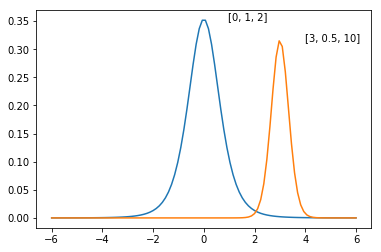

In [18]:
plot(studentsT_PDF, [0,1,2], [3, 0.5, 10])

### Moments
Mean = Median = Mode = A <br>
Variance = $\frac{C}{C-2}B^2$ <br>
Skewness = 0 <br>
Kurtosis = $\frac{3C^2}{8-6C + C^2}B^4$

### Notes
1. Moment r exists iff C > r.

### Aliases and Special Cases
1. The StudentsT distribution if often called simply the t distribution.
2. The StudentsT distribution approaches a Normal distribution in the limit C $\to \infty$ .

### Characterizations
1. The StudentsT distribution is used to characterize small samples (typically, N < 30) from a Normal population.
2. The StudentsT distribution is equivalent to a parameter-mix distribution in which a Normal distribution has a variance modeled as $\sim$InverseGamma. This is symbolized
$$ Normal(\mu, \sigma) \Lambda_{\sigma^2}InverseGamma(A,B) $$